# Data Input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 15,6

In [ ]:
data = pd.read_csv('prosperLoanData_1.csv')

In [ ]:
col_all_NaN = []
perct_null = 0

features = list(data.columns)

for i in range(len(features)):
    var = features[i]
    perct_null = data[features[i]].isnull().sum()/len(data)
    if perct_null > 0.8:
        col_all_NaN.append(var)
        data.drop(var, axis = 1, inplace = True)

# Data Cleaning

In [ ]:
drop = ['CreditGrade', 'ProsperRating (Alpha)','LoanStatus']
data.drop(drop, axis = 1, inplace = True)
data1 = data.drop_duplicates(subset=['ListingKey'])
drop = ['Investors','CreditScoreRangeUpper','CreditScoreRangeLower','BorrowerAPR', 'BorrowerRate', 'LenderYield','LP_CustomerPrincipalPayments', 'LP_InterestandFees',
       'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss',
       'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments','LP_CustomerPayments','GradeScores','ListingKey', 'ListingNumber','ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanKey','LoanNumber','LoanOriginationDate','LoanOriginationQuarter','MemberKey']
data1.drop(drop, axis=1, inplace=True)
data1.shape

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(112726, 44)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112726 entries, 0 to 113936
Data columns (total 44 columns):
Term                                  112726 non-null int64
EstimatedEffectiveYield               83733 non-null float64
EstimatedLoss                         83733 non-null float64
EstimatedReturn                       83733 non-null float64
ProsperRating (numeric)               83733 non-null float64
Grade                                 112595 non-null object
ProsperScore                          83733 non-null float64
ListingCategory (numeric)             112726 non-null int64
BorrowerState                         107226 non-null object
Occupation                            109205 non-null object
EmploymentStatus                      110478 non-null object
EmploymentStatusDuration              105121 non-null float64
IsBorrowerHomeowner                   112726 non-null bool
CurrentlyInGroup                      112726 non-null bool
CurrentCreditLines                    10

In [ ]:
data1.drop(['BorrowerState'], axis=1, inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Data Preprocessing

In [ ]:
dummies = ['Occupation', 'EmploymentStatus', 'IncomeRange']
df_dummies = pd.get_dummies(data1,columns = dummies)

In [ ]:
df_dummies.drop(['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore'], axis=1, inplace=True)

In [ ]:
df_dummies.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
df_dummies['Grade'].value_counts()

C     20972
B     17723
D     16479
A     16030
E     10301
AA     7661
HR     7509
Name: Grade, dtype: int64

In [ ]:
df_dummies.info()

Subsampling

In [ ]:
d1 = df_dummies.loc[df_dummies['Grade']=='AA']
d2 = df_dummies.loc[df_dummies['Grade']=='A']
d3 = df_dummies.loc[df_dummies['Grade']=='B']
d4 = df_dummies.loc[df_dummies['Grade']=='C']
d5 = df_dummies.loc[df_dummies['Grade']=='D']
d6 = df_dummies.loc[df_dummies['Grade']=='E']
d7 = df_dummies.loc[df_dummies['Grade']=='HR']
d1 = d1.sample(7661)
d2 = d2.sample(7661)
d3 = d3.sample(7661)
d4 = d4.sample(5746)
d5 = d5.sample(5745)
d6 = d6.sample(5746)
d7 = d7.sample(5745)

In [ ]:
df_dummies = pd.concat([d1,d2,d3,d4,d5,d6,d7],axis=0)

In [ ]:
df_dummies.info

<bound method DataFrame.info of         Term Grade  ListingCategory (numeric)  EmploymentStatusDuration  \
49312     36    AA                          3                       6.0   
28180     60    AA                          1                      57.0   
2329      36    AA                          3                     119.0   
40591     36    AA                          1                      45.0   
112590    36    AA                          1                     100.0   
110120    60    AA                          1                      67.0   
102113    60    AA                          1                      51.0   
23241     36    AA                          0                       9.0   
44685     36    AA                          1                      33.0   
54470     36    AA                          3                     134.0   
58119     36    AA                          3                     123.0   
38284     36    AA                          7                     12

In [ ]:
df_dummies.shape

(45965, 118)

In [ ]:
df_dummies=df_dummies.reset_index(drop=True)

In [ ]:
def tran_risk_level(x):
    if x=="AA" or x=="A" or x=="B":
        return 0
    else:
        return 1
df_d1=df_dummies
df_d1["Grade"]=df_d1["Grade"].map(tran_risk_level)
df_d1["Grade"].value_counts()

0    22983
1    22982
Name: Grade, dtype: int64

# Logistic Regression

In [ ]:
Y1 = df_d1.ix[:,1]
X1 = df_d1
X1 = X1.drop(['Grade'],axis=1,inplace=False)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)

32175

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score

LR = LogisticRegression()
LR.fit(X_train1,Y_train1)
scores=cross_val_score(LR,X_train1,Y_train1,cv=10)
print (np.mean(scores))
LR.score(X_test1, Y_test1)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.820015823309


0.81472081218274117

In [ ]:
coef = LR.coef_[0]
coef =list(coef)
for i in range(len(coef)):
    coef[i]=abs(coef[i])
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = False,by = 'value')
print(df_coef)

                                       name     value
10                     InquiriesLast6Months  0.081083
11                           TotalInquiries  0.076286
0                                      Term  0.062247
22                  TradesOpenedLast6Months  0.056438
12                     CurrentDelinquencies  0.051969
20                              TotalTrades  0.027325
1                 ListingCategory (numeric)  0.024425
3                       IsBorrowerHomeowner  0.022442
21       TradesNeverDelinquent (percentage)  0.021798
14                  DelinquenciesLast7Years  0.021673
27               LoanMonthsSinceOrigination  0.017108
29                       MonthlyLoanPayment  0.014297
30                            PercentFunded  0.012720
24                         IncomeVerifiable  0.012116
18                      BankcardUtilization  0.011360
15                 PublicRecordsLast10Years  0.010905
7                TotalCreditLinespast7years  0.010575
113              IncomeRange

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


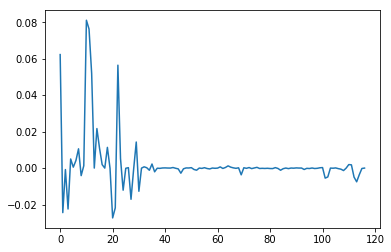

In [ ]:
plt.plot(LR.coef_[0])

subset selection

In [ ]:
df_d21 = df_d1.ix[:,:40]
df_d22 = df_d1.ix[:,90:116]
df_d2 = pd.concat([df_d21,df_d22],axis=1)

In [ ]:
df_d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45965 entries, 0 to 45964
Data columns (total 66 columns):
Term                                      45965 non-null int64
Grade                                     45965 non-null int64
ListingCategory (numeric)                 45965 non-null int64
EmploymentStatusDuration                  45965 non-null float64
IsBorrowerHomeowner                       45965 non-null bool
CurrentlyInGroup                          45965 non-null bool
CurrentCreditLines                        45965 non-null float64
OpenCreditLines                           45965 non-null float64
TotalCreditLinespast7years                45965 non-null float64
OpenRevolvingAccounts                     45965 non-null int64
OpenRevolvingMonthlyPayment               45965 non-null int64
InquiriesLast6Months                      45965 non-null float64
TotalInquiries                            45965 non-null float64
CurrentDelinquencies                      45965 non-null float

In [ ]:
Y1 = df_d2.ix[:,1]
X1 = df_d2
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
LR = LogisticRegression()
LR.fit(X_train1,Y_train1)
scores=cross_val_score(LR,X_train1,Y_train1,cv=10)
print (np.mean(scores))
LR.score(X_test1, Y_test1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


0.820295741577


0.81443074691805661

In [ ]:
coef = LR.coef_[0]
coef =list(coef)
for i in range(len(coef)):
    coef[i]=abs(coef[i])
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = True,by = 'value')
print(df_coef)

                                      name     value
59                         IncomeRange_$0   0.000000
53          EmploymentStatus_Not available  0.000000
17                  RevolvingCreditBalance  0.000001
13                        AmountDelinquent  0.000007
31                         Recommendations  0.000018
41  Occupation_Student - Community College  0.000018
42   Occupation_Student - Technical School  0.000024
46      Occupation_Tradesman - Electrician  0.000045
39     Occupation_Student - College Senior  0.000053
37                    Occupation_Architect  0.000064
54           EmploymentStatus_Not employed  0.000067
19                 AvailableBankcardCredit  0.000078
55                  EmploymentStatus_Other  0.000088
40  Occupation_Student - College Sophomore  0.000098
25                     StatedMonthlyIncome  0.000107
48          Occupation_Tradesman - Plumber  0.000113
44               Occupation_Teacher's Aide  0.000125
38                     Occupation_Attorney  0.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [ ]:
df_coef = df_coef.reset_index(drop=True)

In [ ]:
coef_name = list(df_coef.ix[:,0])
coef_name[:30]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


['IncomeRange_$0 ',
 'EmploymentStatus_Not available',
 'RevolvingCreditBalance',
 'AmountDelinquent',
 'Recommendations',
 'Occupation_Student - Community College',
 'Occupation_Student - Technical School',
 'Occupation_Tradesman - Electrician',
 'Occupation_Student - College Senior',
 'Occupation_Architect',
 'EmploymentStatus_Not employed',
 'AvailableBankcardCredit',
 'EmploymentStatus_Other',
 'Occupation_Student - College Sophomore',
 'StatedMonthlyIncome',
 'Occupation_Tradesman - Plumber',
 "Occupation_Teacher's Aide",
 'Occupation_Attorney',
 'Occupation_Truck Driver',
 'InvestmentFromFriendsAmount',
 'Occupation_Tradesman - Mechanic',
 'Occupation_Tradesman - Carpenter',
 'Occupation_Waiter/Waitress',
 'LoanCurrentDaysDelinquent',
 'EmploymentStatus_Part-time',
 'EmploymentStatus_Retired',
 'LoanOriginalAmount',
 'InvestmentFromFriendsCount',
 'Occupation_Teacher',
 'CurrentCreditLines']

In [ ]:
drop = coef_name[:20]
df_d3 = df_d2.drop(drop,axis=1,inplace=False)
df_d3.head()

,Term,Grade,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,...,EmploymentStatus_Employed,EmploymentStatus_Full-time,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999"
0,36,0,3,6.0,False,False,3.0,3.0,4.0,2,...,0,1,0,0,0,0,0,1,0,0
1,60,0,1,57.0,True,False,15.0,13.0,34.0,10,...,1,0,0,0,0,0,0,0,0,1
2,36,0,3,119.0,True,False,14.0,12.0,43.0,8,...,0,1,0,0,0,0,1,0,0,0
3,36,0,1,45.0,False,False,10.0,10.0,26.0,10,...,1,0,0,0,0,0,0,0,0,1
4,36,0,1,100.0,False,False,6.0,6.0,9.0,5,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_d3.shape

(45965, 46)

In [ ]:
Y1 = df_d3.ix[:,1]
X1 = df_d3
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
LR = LogisticRegression()
LR.fit(X_train1,Y_train1)
scores=cross_val_score(LR,X_train1,Y_train1,cv=10)
print (np.mean(scores))
LR.score(X_test1, Y_test1)

0.840280980063


0.83292240754169689

In [ ]:
coef = LR.coef_[0]
coef =list(coef)
for i in range(len(coef)):
    coef[i]=abs(coef[i])
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = True,by = 'value')
print(df_coef)

                                   name     value
22            LoanCurrentDaysDelinquent  0.000201
2              EmploymentStatusDuration  0.000224
9           OpenRevolvingMonthlyPayment  0.000536
33      Occupation_Tradesman - Mechanic  0.000582
24                   LoanOriginalAmount  0.000807
5                    CurrentCreditLines  0.003784
37           EmploymentStatus_Part-time  0.005393
31                   Occupation_Teacher  0.009542
32     Occupation_Tradesman - Carpenter  0.011265
1             ListingCategory (numeric)  0.014394
7            TotalCreditLinespast7years  0.017465
23           LoanMonthsSinceOrigination  0.018112
13              DelinquenciesLast7Years  0.018115
25                   MonthlyLoanPayment  0.019852
34           Occupation_Waiter/Waitress  0.022597
38             EmploymentStatus_Retired  0.029503
17                          TotalTrades  0.034664
6                       OpenCreditLines  0.038491
11                       TotalInquiries  0.049481


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [ ]:
df_coef = df_coef.reset_index(drop=True)
coef_name = list(df_coef.ix[:,0])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [ ]:
drop = coef_name[:3]
df_d4 = df_d3.drop(drop,axis=1,inplace=False)
df_d4.shape

(45965, 43)

In [ ]:
df_d4.head()

,Term,Grade,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,InquiriesLast6Months,...,EmploymentStatus_Employed,EmploymentStatus_Full-time,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999"
0,36,0,3,False,False,3.0,3.0,4.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
1,60,0,1,True,False,15.0,13.0,34.0,10,0.0,...,1,0,0,0,0,0,0,0,0,1
2,36,0,3,True,False,14.0,12.0,43.0,8,4.0,...,0,1,0,0,0,0,1,0,0,0
3,36,0,1,False,False,10.0,10.0,26.0,10,0.0,...,1,0,0,0,0,0,0,0,0,1
4,36,0,1,False,False,6.0,6.0,9.0,5,0.0,...,1,0,0,0,0,0,0,0,1,0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


0.841739737847


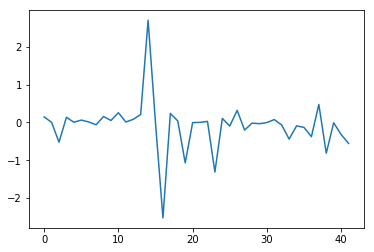

In [ ]:
Y1 = df_d4.ix[:,1]
X1 = df_d4
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
LR = LogisticRegression()
LR.fit(X_train1,Y_train1)
scores=cross_val_score(LR,X_train1,Y_train1,cv=10)
print (np.mean(scores))
LR.score(X_test1, Y_test1)
plt.plot(LR.coef_[0])

In [ ]:
df_d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45965 entries, 0 to 45964
Data columns (total 43 columns):
Term                                   45965 non-null int64
Grade                                  45965 non-null int64
ListingCategory (numeric)              45965 non-null int64
IsBorrowerHomeowner                    45965 non-null bool
CurrentlyInGroup                       45965 non-null bool
CurrentCreditLines                     45965 non-null float64
OpenCreditLines                        45965 non-null float64
TotalCreditLinespast7years             45965 non-null float64
OpenRevolvingAccounts                  45965 non-null int64
InquiriesLast6Months                   45965 non-null float64
TotalInquiries                         45965 non-null float64
CurrentDelinquencies                   45965 non-null float64
DelinquenciesLast7Years                45965 non-null float64
PublicRecordsLast10Years               45965 non-null float64
PublicRecordsLast12Months            

# RandomForest

In [ ]:
Y1 = df_d1.ix[:,1]
X1 = df_d1
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)

32175

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier()
rf.fit(X_train1,Y_train1)
rf.score(X_test1,Y_test1)

0.82661348803480783

                                              name     value
19                         AvailableBankcardCredit  0.170515
18                             BankcardUtilization  0.080250
28                              LoanOriginalAmount  0.074562
29                              MonthlyLoanPayment  0.061144
23                               DebtToIncomeRatio  0.052535
27                      LoanMonthsSinceOrigination  0.040755
11                                  TotalInquiries  0.032514
10                            InquiriesLast6Months  0.032050
9                      OpenRevolvingMonthlyPayment  0.030936
25                             StatedMonthlyIncome  0.030736
21              TradesNeverDelinquent (percentage)  0.030397
17                          RevolvingCreditBalance  0.027530
20                                     TotalTrades  0.023417
7                       TotalCreditLinespast7years  0.022793
2                         EmploymentStatusDuration  0.022508
6                       

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


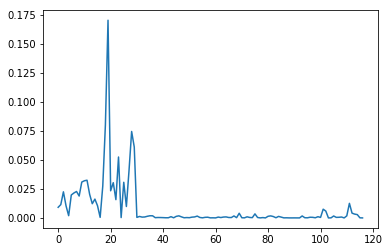

In [ ]:
importances = rf.feature_importances_
coef =list(importances)
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = False,by = 'value')
print(df_coef)
plt.plot(importances)

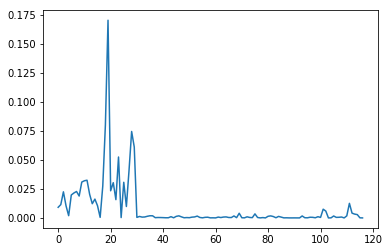

In [ ]:
plt.plot(importances)

In [ ]:
df_d21 = df_d1.ix[:,:35]
df_d22 = df_d1.ix[:,100:116]
df_d2 = pd.concat([df_d21,df_d22],axis=1)

In [ ]:
Y1 = df_d2.ix[:,1]
X1 = df_d2
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
rf = RandomForestClassifier()
rf.fit(X_train1,Y_train1)
rf.score(X_test1,Y_test1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


0.83981145757795506

                                  name     value
19             AvailableBankcardCredit  0.153975
28                  LoanOriginalAmount  0.105293
29                  MonthlyLoanPayment  0.080241
18                 BankcardUtilization  0.075610
23                   DebtToIncomeRatio  0.058085
21  TradesNeverDelinquent (percentage)  0.042943
10                InquiriesLast6Months  0.042239
27          LoanMonthsSinceOrigination  0.041836
25                 StatedMonthlyIncome  0.034220
17              RevolvingCreditBalance  0.029304
14             DelinquenciesLast7Years  0.027519
9          OpenRevolvingMonthlyPayment  0.027456
11                      TotalInquiries  0.025134
2             EmploymentStatusDuration  0.024035
20                         TotalTrades  0.022216
7           TotalCreditLinespast7years  0.020858
8                OpenRevolvingAccounts  0.020550
5                   CurrentCreditLines  0.018336
6                      OpenCreditLines  0.017390
13                  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


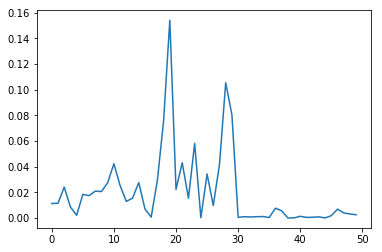

In [ ]:
importances = rf.feature_importances_
coef =list(importances)
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = False,by = 'value')
print(df_coef)
plt.plot(importances)

In [ ]:
df_d3 = df_d2.ix[:,:39]

In [ ]:
Y1 = df_d3.ix[:,1]
X1 = df_d3
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
rf = RandomForestClassifier()
rf.fit(X_train1,Y_train1)
rf.score(X_test1,Y_test1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


0.84379985496736765

                                  name     value
19             AvailableBankcardCredit  0.153891
29                  MonthlyLoanPayment  0.104754
28                  LoanOriginalAmount  0.102924
18                 BankcardUtilization  0.079387
23                   DebtToIncomeRatio  0.056812
27          LoanMonthsSinceOrigination  0.045863
21  TradesNeverDelinquent (percentage)  0.044433
25                 StatedMonthlyIncome  0.043684
11                      TotalInquiries  0.033887
10                InquiriesLast6Months  0.030902
17              RevolvingCreditBalance  0.028261
9          OpenRevolvingMonthlyPayment  0.028169
2             EmploymentStatusDuration  0.024786
20                         TotalTrades  0.022634
7           TotalCreditLinespast7years  0.021240
6                      OpenCreditLines  0.019449
5                   CurrentCreditLines  0.018558
8                OpenRevolvingAccounts  0.018344
14             DelinquenciesLast7Years  0.014853
22             Trade

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


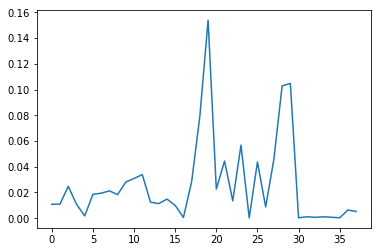

In [ ]:
importances = rf.feature_importances_
coef =list(importances)
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = False,by = 'value')
print(df_coef)
plt.plot(importances)

In [ ]:
df_d4 = df_d3.drop(['ListingCategory (numeric)'],axis=1, inplace=False)

In [ ]:
Y1 = df_d4.ix[:,1]
X1 = df_d4
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
rf = RandomForestClassifier()
rf.fit(X_train1,Y_train1)
rf.score(X_test1,Y_test1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


0.84467005076142132

                                  name     value
18             AvailableBankcardCredit  0.161749
27                  LoanOriginalAmount  0.124921
17                 BankcardUtilization  0.085478
28                  MonthlyLoanPayment  0.082941
22                   DebtToIncomeRatio  0.058464
26          LoanMonthsSinceOrigination  0.044483
9                 InquiriesLast6Months  0.042533
20  TradesNeverDelinquent (percentage)  0.038862
24                 StatedMonthlyIncome  0.034012
13             DelinquenciesLast7Years  0.030987
16              RevolvingCreditBalance  0.029869
8          OpenRevolvingMonthlyPayment  0.027995
1             EmploymentStatusDuration  0.025468
10                      TotalInquiries  0.024702
19                         TotalTrades  0.021787
6           TotalCreditLinespast7years  0.021717
4                   CurrentCreditLines  0.021023
7                OpenRevolvingAccounts  0.018519
5                      OpenCreditLines  0.017744
21             Trade

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


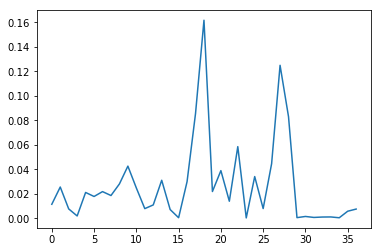

In [ ]:
importances = rf.feature_importances_
coef =list(importances)
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = False,by = 'value')
print(df_coef)
plt.plot(importances)

In [ ]:
df_d5 = df_d4.ix[:,:30]

In [ ]:
Y1 = df_d5.ix[:,1]
X1 = df_d5
X1 = X1.drop(['Grade'],axis=1,inplace=False)
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = .3, random_state=25)
len(X_train1)
rf = RandomForestClassifier()
rf.fit(X_train1,Y_train1)
rf.score(X_test1,Y_test1)

0.84916606236403191

                                  name     value
18             AvailableBankcardCredit  0.153693
28                  MonthlyLoanPayment  0.145196
17                 BankcardUtilization  0.083917
27                  LoanOriginalAmount  0.078406
22                   DebtToIncomeRatio  0.061431
26          LoanMonthsSinceOrigination  0.046644
20  TradesNeverDelinquent (percentage)  0.046179
24                 StatedMonthlyIncome  0.038644
9                 InquiriesLast6Months  0.037095
10                      TotalInquiries  0.030260
16              RevolvingCreditBalance  0.029149
8          OpenRevolvingMonthlyPayment  0.028264
1             EmploymentStatusDuration  0.024688
6           TotalCreditLinespast7years  0.022775
19                         TotalTrades  0.021848
4                   CurrentCreditLines  0.020187
7                OpenRevolvingAccounts  0.018625
5                      OpenCreditLines  0.017314
21             TradesOpenedLast6Months  0.015740
13             Delin

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


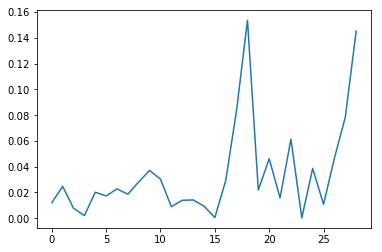

In [ ]:
importances = rf.feature_importances_
coef =list(importances)
coef_name = list(X_test1.columns)
coef_data = {'name':coef_name, 'value':coef}
df_coef = pd.DataFrame(coef_data)
df_coef = df_coef.sort_index(axis = 0,ascending = False,by = 'value')
print(df_coef)
plt.plot(importances)